In [1]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
from numpy import asarray
from numpy import save

In [2]:
import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [3]:
dataset_home = 'datasets/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    labeldirs = ['Afridi/', 'Messi/','Ronaldo/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
seed(1)
val_ratio = 0.10
src_directory = 'all_images/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('afridi'):
        dst = dataset_home + dst_dir + 'Afridi/'  + file
        copyfile(src, dst)
    elif file.startswith('messi'):
        dst = dataset_home + dst_dir + 'Messi/'  + file
        copyfile(src, dst) 
    elif file.startswith('ronaldo'):
        dst = dataset_home + dst_dir + 'Ronaldo/'  + file
        copyfile(src, dst) 

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
datagen = ImageDataGenerator(rescale=1.0/255.0)
train_it= datagen.flow_from_directory('datasets/train/', batch_size=64, class_mode='categorical', target_size=(200, 200))
test_it = datagen.flow_from_directory('datasets/test/',  batch_size=64, class_mode='categorical', target_size=(200, 200))

Found 284 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [6]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [7]:
#def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))   
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
        
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model
model =define_model()

Model: "sequential"
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 200, 200, 32)     128       
 ormalization)                                                   
                                    

In [8]:
#history=model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=2, verbose=0)

In [7]:
def define_model1():
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(200,200,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(3,activation='softmax'))
    model.summary()
    return model
model= define_model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        1

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
history=model.fit(train_it, epochs=10,steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it))

Epoch 1/10
5/5 [==============================] - 49s 9s/step - loss: 2.6856 - accuracy: 0.3627 - val_loss: 1.0979 - val_accuracy: 0.3143
Epoch 2/10
5/5 [==============================] - 22s 4s/step - loss: 1.1325 - accuracy: 0.3662 - val_loss: 1.0808 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 18s 3s/step - loss: 1.0727 - accuracy: 0.3803 - val_loss: 1.0869 - val_accuracy: 0.3714
Epoch 4/10
5/5 [==============================] - 19s 4s/step - loss: 1.0298 - accuracy: 0.4965 - val_loss: 1.0540 - val_accuracy: 0.4000
Epoch 5/10
5/5 [==============================] - 18s 3s/step - loss: 0.9253 - accuracy: 0.6549 - val_loss: 0.9974 - val_accuracy: 0.4286
Epoch 6/10
5/5 [==============================] - 18s 3s/step - loss: 0.8297 - accuracy: 0.6479 - val_loss: 0.9427 - val_accuracy: 0.4857
Epoch 7/10
5/5 [==============================] - 18s 3s/step - loss: 0.7620 - accuracy: 0.6866 - val_loss: 0.8926 - val_accuracy: 0.5714
Epoch 8/10
5/5 [==================

In [10]:
len(train_it)

5

In [11]:
from matplotlib import pyplot as plt


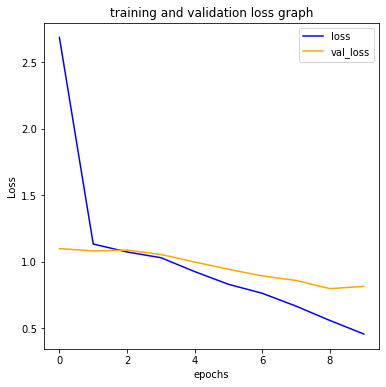

In [12]:
def accuracy_loss_graph(history):
    plt.figure(figsize=(6,6))
    plt.plot(history.history['loss'], label='loss', color='blue')
    plt.plot(history.history['val_loss'], label='val_loss', color='orange')
    plt.legend()
    plt.title('training and validation loss graph')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.show()
accuracy_loss_graph(history)

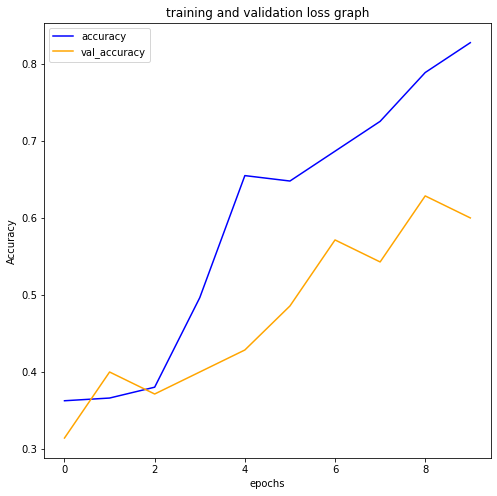

In [13]:
def accuracy_loss_graph(history):
    plt.figure(figsize=(8,8))
    plt.plot(history.history['accuracy'], label='accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', color='orange')
    plt.legend()
    plt.title('training and validation loss graph')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.show()
accuracy_loss_graph(history)

In [14]:
_, acc = model.evaluate(test_it)

1/1 [==============================] - 1s 641ms/step - loss: 0.8138 - accuracy: 0.6000


In [15]:
print(f'Accuracy is : {round(acc*100,2)}')

Accuracy is : 60.0


In [16]:
test_it.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
import numpy as np

In [18]:
predicted_value=np.argmax(model.predict(test_it),axis=-1)
predicted_value

1/1 [==============================] - 1s 878ms/step


array([0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.metrics import classification_report

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(test_it.classes,predicted_value)
print(cm)

[[2 2 8]
 [3 1 8]
 [6 2 3]]


In [25]:
import seaborn as sns

<AxesSubplot:>

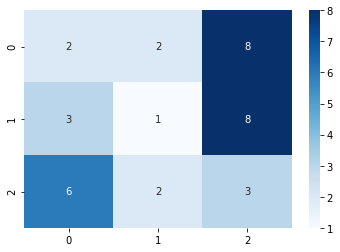

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

In [27]:
print('classification report \n',classification_report(test_it.classes,predicted_value))

classification report 
               precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       0.20      0.08      0.12        12
           2       0.16      0.27      0.20        11

    accuracy                           0.17        35
   macro avg       0.18      0.17      0.16        35
weighted avg       0.18      0.17      0.16        35

